# Lyrics to genres multi-label classification

### Data loading and preparing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [9]:
# data = pd.read_csv(r"data_cleaned/final.csv")
data = pd.read_csv(r"data_cleaned/data_final2_equalized.csv")

In [10]:
data.head()

,artist,track,album,genre,lyrics
0,Blue Öyster Cult,ME 262,Secret Treaties,classic rock,"Says: ""Willie's done quite a job"" Says: ""I'..."
1,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...,"post-punk,new wave",Absorbing your words Battles raging within me ...
2,Atlas Sound,Criminals,Logos,"indie rock,experimental",This criminal Walked into my room He asked me ...
3,Annisokay,Coma Blue,Arms,emo,"Fuck Nobody, anybody, somebody, who are you? ..."
4,Nickelback,Burn It To The Ground,Dark Horse,"hard rock,alternative rock,hard rock","Well, it's midnight, damn right, we're wound ..."


### Unique genre labels

In [11]:
unique_genres = set()

for row in data.genre:
    for item in row.split(","):
        unique_genres.add(item)

unique_genres = list(unique_genres)
print(len(unique_genres))
print(unique_genres)

24
['pop', 'classic rock', 'punk', 'emo', 'indie pop', 'alternative rock', 'experimental', 'hardcore', 'progressive rock', 'metal', 'hard rock', 'new wave', 'pop punk', 'rock', 'soul', 'synthpop', 'indie rock', 'post-punk', 'electronic', 'metalcore', 'post-hardcore', 'singer-songwriter', 'rap', 'folk']


In [12]:
def drop_genres(genres_list):
    new_genres = []
    
    for genre in genres_list.split(","):
        if genres[genre] >= 930:
            new_genres.append(genre)
    
    return ','.join(new_genres) 


def get_new_genres(df):
    genres = dict()
    
    for row in df.genre:
        for item in row.split(","):
            if item in genres:
                genres[item] += 1
            else:
                genres[item] = 1
    
    return genres

In [13]:
genres = get_new_genres(data)

data["genre"] = data["genre"].apply(lambda x: drop_genres(x))
data = data.drop(data[data["genre"] == ""].index)

### Dropping songs where length of lyrics is less than 50 words

In [14]:
data = data.drop(data[data["lyrics"].map(lambda x: len(x.split())) < 100].index)

### Number of genre occurances

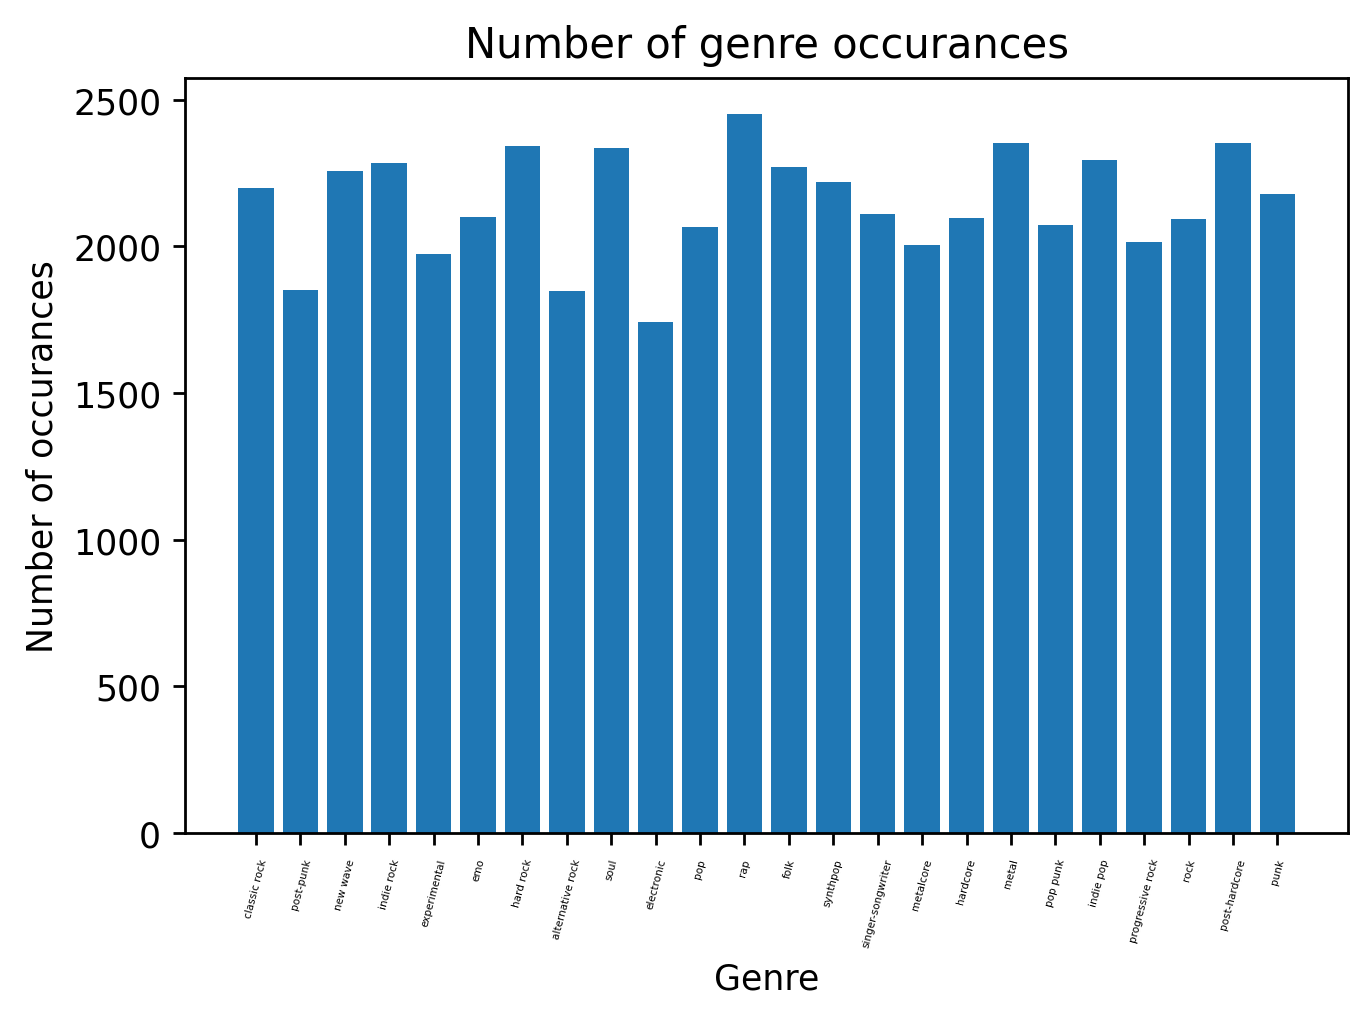

In [15]:
genres = get_new_genres(data)

plt.figure(dpi=250)
plt.bar(genres.keys(), genres.values())
plt.title("Number of genre occurances")
plt.ylabel('Number of occurances')
plt.xlabel('Genre')
plt.xticks(list(genres.keys()), rotation=75, fontsize=3)
plt.show()

### Creating vectors with encoded genre labels

In [16]:
def set_labels(x):
    labels = np.array([0 for i in range(len(unique_genres))])

    for item in x.split(","):
        labels[unique_genres.index(item)] = 1
    
    return np.array(labels)

In [17]:
data["genre"] = data["genre"].apply(lambda x: x.replace("\n"," "))
data["labels"] = data["genre"].apply(lambda x: set_labels(x))

In [64]:
data.head()

,genre,lyrics,labels
1,neo soul,i really can not stay baby it is cold outside ...,"[0, 0, 0, 1, 0, 0, 0, 0]"
14,neo soul,santa claus is comin to town santa claus is co...,"[0, 0, 0, 1, 0, 0, 0, 0]"
19,neo soul,ladies gentlemen we got anthony hamilton in th...,"[0, 0, 0, 1, 0, 0, 0, 0]"
35,neo soul,i am neon cold neon not a mystery all i have e...,"[0, 0, 0, 1, 0, 0, 0, 0]"
42,neo soul,remember every move you made as if it was stil...,"[0, 0, 0, 1, 0, 0, 0, 0]"


### Clearing lyrics

In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

def remove_punctuation(text): 
    text = re.sub(r'[?|!|\'|"|#]', r'',text)
    text = re.sub(r'[.|,|)|(|\|/]', r' ',text)
    text = text.strip()
    text = text.replace("\n"," ")
    return text

def remove_numbers(text):
    result = ""
    
    for word in text.split():
        alpha_word = re.sub('[^a-z A-Z]+', '', word)
        result += alpha_word
        result += " "
    result = result.strip()
    
    return result

def ultimate_text_cleaning(text):
    text = clean_text(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [19]:
data["lyrics"] = data["lyrics"].apply(lambda x: ultimate_text_cleaning(x))

In [46]:
data.head()

,genre,lyrics,labels
1,neo soul,i really can not stay baby it is cold outside ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14,neo soul,santa claus is comin to town santa claus is co...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19,neo soul,ladies gentlemen we got anthony hamilton in th...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
35,neo soul,i am neon cold neon not a mystery all i have e...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
42,neo soul,remember every move you made as if it was stil...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [20]:
sample_lyrics = [i for i in data["lyrics"][:3]]
print(sample_lyrics)

['says willie is done quite a job says i am gonna make you a star my captain von ondine here is your next patrol a flight of english bombers across the canal after twelve they will all be here they hung there dependent from the sky like some heavy metal fruit these bombers are ripe and ready to tilt must these englishmen live that i might die must they live that i might die sometimes i would faint and be lost to our side but death so watch me in mirrors keep me on a glide path get me through these radars no i cannot fail while my great silver slugs are eager to feed i can not fail no not now they hung there dependant from the sky like some heavy metal fruit these bombers are ripe and ready to tilt must these englishmen live that i might die must they live that i might die junkers jumo blasts', 'absorbing your words battles raging within me absorbing your words is gradually tearing my soul in two there is not much i can do despite my fear it helps to share my nostalgia with you there is

### Checkpoint

In [65]:
# data.to_csv(r"data_cleaned/final_cleaned_labeled2.csv", index=False)

In [27]:
data = pd.read_csv(r"data_cleaned/final_cleaned_labeled2.csv")

In [28]:
def set_labels(x):
    labels = np.array([0 for i in range(len(unique_genres))])

    for item in x.split(","):
        labels[unique_genres.index(item)] = 1
    
    return np.array(labels)

In [29]:
unique_genres = set()

for row in data.genre:
    for item in row.split(","):
        unique_genres.add(item)

unique_genres = list(unique_genres)

data["genre"] = data["genre"].apply(lambda x: x.replace("\n"," "))
data["labels"] = data["genre"].apply(lambda x: set_labels(x))

### Splitting dataset to test and train 

In [46]:
x_train, x_test, y_train, y_test = train_test_split(data["lyrics"], data["labels"], test_size=0.2, shuffle=True)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(66470,)
(16618,)
(66470,)
(16618,)


In [48]:
y_train = np.stack(y_train.values).astype('float32')
y_test = np.stack(y_test.values).astype('float32')

### Tokenization

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Check statistics for  maxlen

In [50]:
def calculate_words_num(x):
  x = x.split(" ")
  return len(x)

print(data["lyrics"].apply(calculate_words_num).mean())
print(data["lyrics"].apply(calculate_words_num).median())
print(data["lyrics"].apply(calculate_words_num).max())
print(data["lyrics"].apply(calculate_words_num).min())

189.6780401502022
201.0
347
31


In [45]:
max_words = 30_000
maxlen = 200
output_dim = 64

In [36]:
tokenizer = Tokenizer(lower=True, num_words=max_words)
tokenizer.fit_on_texts(list(x_train) + list(x_test))

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Check shapes

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(66470, 200)
(16618, 200)
(66470, 15)
(16618, 15)


### CNN with embedding model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPool1D, MaxPooling1D, Activation, Dropout, Conv1D

In [39]:
unique_genres = set()

for row in data.genre:
    for item in row.split(","):
        unique_genres.add(item)

num_classes = len(unique_genres)
print(num_classes)

15


In [61]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=output_dim, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.3))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(100, kernel_regularizer='l1_l2'))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(num_classes, name="output"))
model.add(Activation('sigmoid'))

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           1920000   
                                                                 
 conv1d (Conv1D)             (None, 194, 32)           14368     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 97, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 91, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 300)               9

### Custom loss function to give more weigth for 1's (because of multilabeling)

In [66]:
import keras.backend as tfb
from keras.utils.generic_utils import get_custom_objects

In [67]:
POS_WEIGHT = 10  # multiplier for positive targets, needs to be tuned

def weighted_binary_crossentropy(target, output):
    """
    Weighted binary crossentropy between an output tensor
    and a target tensor. POS_WEIGHT is used as a multiplier
    for the positive targets.

    Combination of the following functions:
    * keras.losses.binary_crossentropy
    * keras.backend.tensorflow_backend.binary_crossentropy
    * tf.nn.weighted_cross_entropy_with_logits
    """
    # transform back to logits
    _epsilon = tfb._to_tensor(tfb.epsilon(), output.dtype.base_dtype)
    output = tf.clip_by_value(output, _epsilon, 1 - _epsilon)
    output = tf.math.log(output / (1 - output))
    # compute weighted loss
    target = tf.cast(target, tf.float32)
    loss = tf.nn.weighted_cross_entropy_with_logits(labels=target,
                                                    logits=output,
                                                    pos_weight=POS_WEIGHT)
    return tf.reduce_mean(loss, axis=-1)


get_custom_objects().update({"weighted_binary_crossentropy": weighted_binary_crossentropy})

In [64]:
def f1_score(y_true, y_logit):
    """
    Calculate F1 score
    y_true: true value
    y_logit: predicted value
    """
    true_positives = tfb.sum(tfb.round(tfb.clip(y_true * y_logit, 0, 1)))
    possible_positives = tfb.sum(tfb.round(tfb.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tfb.epsilon())
    predicted_positives = tfb.sum(tfb.round(tfb.clip(y_logit, 0, 1)))
    precision = true_positives / (predicted_positives + tfb.epsilon())
    return (2 * precision * recall) / (precision + recall + tfb.epsilon())

In [109]:
# model.compile(optimizer="adam", 
#               loss=tf.nn.sigmoid_cross_entropy_with_logits, 
#               metrics=['accuracy', f1_score, tf.keras.metrics.AUC()])

model.compile(optimizer="adam", 
              loss="binary_crossentropy", 
              metrics=['accuracy', f1_score, tf.keras.metrics.AUC()])

# model.compile(optimizer="adam", 
#               loss="weighted_binary_crossentropy", 
#               metrics=['accuracy', f1_score, tf.keras.metrics.AUC()])

### Train

In [110]:
batch_size = 64
epochs = 50

In [111]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
276/939 [=======>......................] - ETA: 2:08 - loss: 0.5695 - auc: 0.6527

KeyboardInterrupt: 

### Check metrics history

In [ ]:
hist.history.keys()

{'loss': [0.13785748183727264,
  0.06410814076662064,
  0.06404061615467072,
  0.06393874436616898,
  0.06363218277692795],
 'categorical_accuracy': [0.008970176801085472,
  0.012082279659807682,
  0.014695113524794579,
  0.01634269766509533,
  0.0184063371270895],
 'val_loss': [0.06421022117137909,
  0.06419020891189575,
  0.06419210880994797,
  0.06411249190568924,
  0.06343831866979599],
 'val_categorical_accuracy': [0.011532125063240528,
  0.011082821525633335,
  0.013179571367800236,
  0.013179571367800236,
  0.01872098259627819]}

Loss

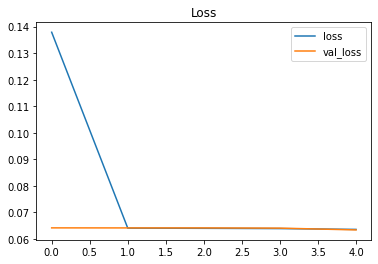

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Categorical accuracy

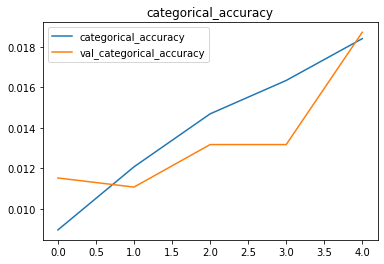

In [ ]:
plt.title("Accuracy")
plt.plot(hist.history["accuracy"], label="accuracy")
plt.plot(hist.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.title("F1 score")
plt.plot(hist.history["f1_score"], label="f1_score")
plt.plot(hist.history["val_f1_score"], label="val_f1_score")
plt.xlabel("Epochs")
plt.ylabel("F1 score")
plt.legend()
plt.show()

### Evaluate

In [ ]:
model.evaluate(x_test)

### Test

In [ ]:
k = 4

indexes_pred = np.argwhere(y_pred[k] >= 0.5)
indexes_true = np.argwhere(y_test[k] == 1)

indexes_pred.reshape((1,-1))
indexes_true.reshape((1,-1))

for i in indexes_pred:
  print(list(unique_genres)[i[0]])

print(y_pred[k])
print("\n")

for i in indexes_true:
  print(list(unique_genres)[i[0]])

print(y_test[k])

### Save/Load model

In [ ]:
model.save(r'models/model_cnn.h5')


In [ ]:
new_model = tf.keras.models.load_model(r'models/model_cnn.h5')


### LSTM model

In [72]:
from keras.layers import LSTM, Bidirectional, SpatialDropout1D

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=output_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(units=32, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', 
                             recurrent_dropout=0.0, dropout=0.5, kernel_initializer='glorot_uniform'),
	                      merge_mode='concat'))
model.add(Bidirectional(LSTM(units=32, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', 
                             recurrent_dropout=0.0, dropout=0.5, kernel_initializer='glorot_uniform'),
	                      merge_mode='concat'))
model.add(Dropout(0.3)) 
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="adam", 
              loss="weighted_binary_crossentropy", 
              metrics=['accuracy', f1_score, tf.keras.metrics.AUC()])

In [ ]:
batch_size = 64
epochs = 20

In [ ]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

### Save/Load

In [ ]:
model.save(r'models/model_lstm.h5')

In [ ]:
new_model = tf.keras.models.load_model(r'models/model_cnn.h5')

### Check

In [ ]:
model.evaluate(x_test)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
k = 4

indexes_pred = np.argwhere(y_pred[k] >= 0.9)
indexes_true = np.argwhere(y_test[k] == 1)

indexes_pred.reshape((1,-1))
indexes_true.reshape((1,-1))

for i in indexes_pred:
  print(list(unique_genres)[i[0]])

print(y_pred[k])
print("\n")

for i in indexes_true:
  print(list(unique_genres)[i[0]])

print(y_test[k])

### Fasttext embedding

In [40]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
import tensorflow as tf

In [53]:

fasttext = KeyedVectors.load_word2vec_format(r'wiki-news-300d-1M-subword.vec', binary=False, encoding='utf8')


In [55]:
x_train, x_test, y_train, y_test = train_test_split(data["lyrics"], data["labels"], test_size=0.2, shuffle=True)
y_train = np.stack(y_train.values).astype('float32')
y_test = np.stack(y_test.values).astype('float32')

In [56]:
tokenizer = Tokenizer(lower=True, num_words=max_words)
tokenizer.fit_on_texts(list(x_train) + list(x_test))

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [58]:
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1

weight_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = fasttext[word]
        weight_matrix[i] = embedding_vector
    except KeyError:
        weight_matrix[i] = np.random.uniform(-5, 5, embedding_dim)               

### CNN

In [61]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen, weights=[weight_matrix], trainable=False))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer='l1_l2'))
model.add(MaxPooling1D())
model.add(Dropout(0.3))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer='l1_l2'))
model.add(GlobalMaxPool1D())
model.add(Dense(100, kernel_regularizer='l1_l2'))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(num_classes, name="output"))
model.add(Activation('sigmoid'))

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 300)          27092700  
                                                                 
 conv1d (Conv1D)             (None, 198, 64)           57664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 97, 64)            12352     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                       

In [68]:
model.compile(optimizer="adam", 
              loss="weighted_binary_crossentropy", 
              metrics=['accuracy', f1_score, tf.keras.metrics.AUC()])

In [69]:
batch_size = 64
epochs = 20

In [70]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
1039/1039 [==============================] - 55s 52ms/step - loss: 1.8395 - accuracy: 0.1527 - f1_score: 0.2590 - auc: 0.6663 - val_loss: 1.3038 - val_accuracy: 0.1673 - val_f1_score: 0.2684 - val_auc: 0.6877
Epoch 2/20
1039/1039 [==============================] - 54s 52ms/step - loss: 1.3003 - accuracy: 0.1678 - f1_score: 0.2700 - auc: 0.6911 - val_loss: 1.2887 - val_accuracy: 0.1866 - val_f1_score: 0.2718 - val_auc: 0.7005
Epoch 3/20
1039/1039 [==============================] - 53s 51ms/step - loss: 1.2814 - accuracy: 0.2007 - f1_score: 0.2822 - auc: 0.7072 - val_loss: 1.2747 - val_accuracy: 0.2151 - val_f1_score: 0.2869 - val_auc: 0.7152
Epoch 4/20
1039/1039 [==============================] - 58s 55ms/step - loss: 1.2647 - accuracy: 0.2239 - f1_score: 0.2900 - auc: 0.7193 - val_loss: 1.2559 - val_accuracy: 0.2255 - val_f1_score: 0.2962 - val_auc: 0.7268
Epoch 5/20
1039/1039 [==============================] - 61s 58ms/step - loss: 1.2488 - accuracy: 0.2294 - f1_score: 0.29

KeyboardInterrupt: 

### Save/Load

In [ ]:
model.save(r'models/model_cnn_fasttext.h5')

In [ ]:
new_model = tf.keras.models.load_model(r'models/model_cnn_fasttext.h5')

### LSTM

In [75]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen, weights=[weight_matrix], trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(units=64, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', 
                             recurrent_dropout=0.0, dropout=0.5, kernel_initializer='glorot_uniform'),
	                    merge_mode='concat'))
model.add(Bidirectional(LSTM(units=64, return_sequences=True, activation='tanh', recurrent_activation='sigmoid', 
                             recurrent_dropout=0.0, dropout=0.5, kernel_initializer='glorot_uniform'),
	                      merge_mode='concat'))
model.add(Dropout(0.3)) 
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

In [76]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 300)          27092700  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 128)         186880    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 200, 128)          0         
                                                      

In [77]:
model.compile(optimizer="adam", 
              loss="weighted_binary_crossentropy", 
              metrics=['accuracy', f1_score, tf.keras.metrics.AUC()])

In [78]:
batch_size = 64
epochs = 10

In [79]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
  53/1039 [>.............................] - ETA: 9:31 - loss: 1.3525 - accuracy: 0.1981 - f1_score: 0.2483 - auc_1: 0.6307

KeyboardInterrupt: 

### Save/Load

In [ ]:
model.save(r'models/model_lstm_fasttext.h5')

In [ ]:
new_model = tf.keras.models.load_model(r'models/model_lstm_fasttext.h5')